In [3]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

## location 1: Trentino

In [315]:
def ssim_dtm(location):
    # load data, nodata value, and create mask
    ref_dtm=rasterio.open(f'reference_dtm/{location}_dtm_ref_1sec_point.tif').read(1)
    mask_ref=np.logical_and(ref_dtm!=255,ref_dtm!=-10000)

    edtm_r=rasterio.open(f'tiles/edtm_{location}.tif')
    edtm=edtm_r.read(1)
    mask_edtm = edtm != edtm_r.nodata

    fathom_r=rasterio.open(f'tiles/fathom_{location}.tif')
    fathom=fathom_r.read(1)
    mask_fathom = fathom != fathom_r.nodata

    fabdem_r=rasterio.open(f'tiles/fabdem_{location}.tif')
    fabdem=fabdem_r.read(1).astype(float)
    mask_fabdem = fabdem != fabdem_r.nodata

    merit_r=rasterio.open(f'tiles/merit_{location}.tif')
    merit=merit_r.read(1)
    mask_merit = merit != merit_r.nodata
    
    # aggregate mask to a single mask
    mask = mask_ref & mask_edtm & mask_fathom & mask_fabdem & mask_merit

    # keep the valid pixel for comparison
    fabdem[~mask]=np.nan
    fabdem=np.nan_to_num(fabdem)
    
    fathom[~mask]=np.nan
    fathom=np.nan_to_num(fathom)

    merit[~mask]=np.nan
    merit=np.nan_to_num(merit)

    edtm[~mask]=np.nan
    edtm=np.nan_to_num(edtm)    
    
    ref_dtm[~mask]=np.nan
    ref_dtm=np.nan_to_num(ref_dtm)    
    
    # comparison figures
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 4), sharex=True, sharey=True)
    ax = axes.ravel()

    mse_ref = mean_squared_error(ref_dtm, ref_dtm)
    ssim_ref = ssim(ref_dtm, ref_dtm,win_size=11, sigma=1.5, k1=0.01, k2=0.03,full=False,mask=mask, data_range=ref_dtm.max() - ref_dtm.min())

    mse_edtm = mean_squared_error(edtm, ref_dtm)
    ssim_edtm = ssim(edtm, ref_dtm, win_size=11, sigma=1.5, k1=0.01, k2=0.03,full=False,mask=mask, data_range=ref_dtm.max() - ref_dtm.min())

    mse_fathom = mean_squared_error(fathom, ref_dtm)
    ssim_fathom = ssim(fathom, ref_dtm, win_size=11, sigma=1.5, k1=0.01, k2=0.03,full=False,mask=mask, data_range=ref_dtm.max() - ref_dtm.min())

    mse_fabdem = mean_squared_error(fabdem, ref_dtm)
    ssim_fabdem = ssim(fabdem, ref_dtm, win_size=11, sigma=1.5, k1=0.01, k2=0.03,full=False,mask=mask, data_range=ref_dtm.max() - ref_dtm.min())

    mse_merit = mean_squared_error(merit, ref_dtm)
    ssim_merit = ssim(merit, ref_dtm, win_size=11, sigma=1.5, k1=0.01, k2=0.03,full=False,mask=mask, data_range=ref_dtm.max() - ref_dtm.min())
    
    vmax=np.quantile(ref_dtm,.98)
    vmin=np.quantile(ref_dtm,.02)
    ax[0].imshow(ref_dtm, cmap=plt.cm.terrain,vmax=vmax,vmin=vmin)
    ax[0].set_xlabel(f'MSE: {mse_ref:.4f}, SSIM: {ssim_ref:.4f}')
    ax[0].set_title('reference DTM')

    ax[1].imshow(edtm, cmap=plt.cm.terrain,vmax=vmax,vmin=vmin)
    ax[1].set_xlabel(f'MSE: {mse_edtm:.4f}, SSIM: {ssim_edtm:.4f}')
    ax[1].set_title('EDTM')

    ax[2].imshow(fathom, cmap=plt.cm.terrain,vmax=vmax,vmin=vmin)
    ax[2].set_xlabel(f'MSE: {mse_fathom:.4f}, SSIM: {ssim_fathom:.4f}')
    ax[2].set_title('FATHOM')

    ax[3].imshow(fabdem, cmap=plt.cm.terrain,vmax=vmax,vmin=vmin)
    ax[3].set_xlabel(f'MSE: {mse_fabdem:.4f}, SSIM: {ssim_fabdem:.4f}')
    ax[3].set_title('FABDEM')

    ax[4].imshow(merit, cmap=plt.cm.terrain,vmax=vmax,vmin=vmin)
    ax[4].set_xlabel(f'MSE: {mse_merit:.4f}, SSIM: {ssim_merit:.4f}')
    ax[4].set_title('MERIT')



    plt.tight_layout()
    plt.savefig(f'ssim/ssim_{location}.png')

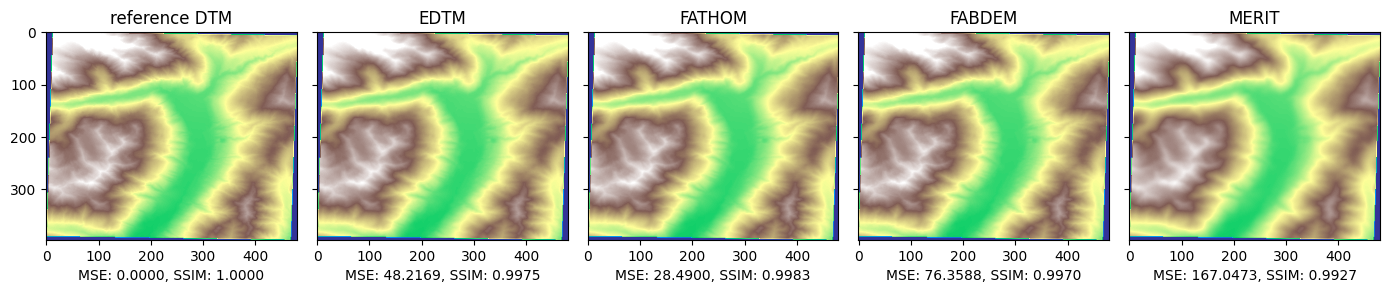

In [316]:
ssim_dtm('trentino')

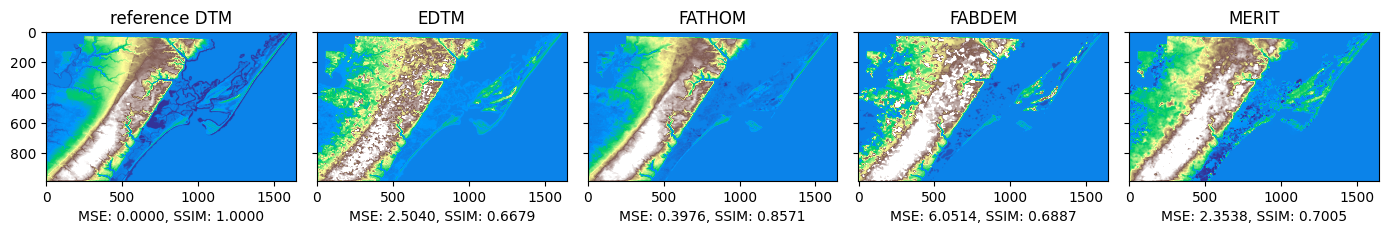

In [317]:
ssim_dtm('chincoteague')

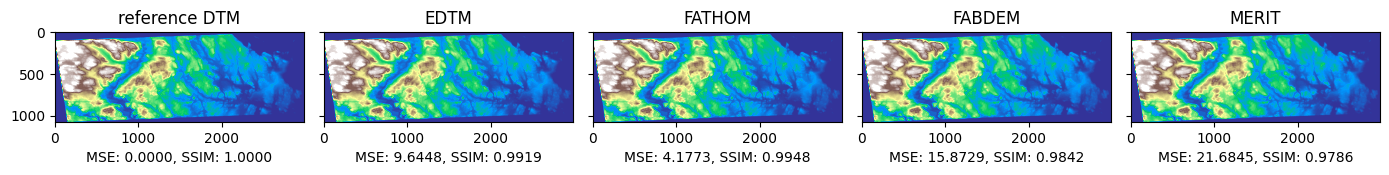

In [318]:
ssim_dtm('norway')